In [30]:
import pandas as pd
import scanpy as sc

# Load the counts matrix (rows: cells, columns: genes)
counts = pd.read_csv('symsim_true_counts_20000genes_500cells_simple.csv', index_col=0)

# Create the AnnData object from the counts
adata = sc.AnnData(counts)

# Load the labels file with the first column as the index.
# The labels file has columns: the index (cell number) and "x" (the class label).
labels = pd.read_csv('symsim_labels_20000genes_500cells_simple.csv', index_col=0)

# Check the first few rows of the labels file to verify:
print(labels.head())
print("-------------------")
print(counts.head())

# Assuming the cell numbers in the counts file match the index of the labels,
# assign the label column "x" to adata.obs.
adata.var['gene_class'] = labels['x'].astype(str)

print(adata.var)



   x
1  1
2  1
3  1
4  1
5  1
-------------------
   X1  X2  X3  X4  X5  X6   X7  X8  X9  X10  ...  X19991  X19992  X19993  \
1   9  10   0   2   0   4   82   1  24    0  ...      57       5       6   
2   2  12   0   1   0   2   18  26   9    2  ...      11      12      41   
3  16   3   1   5   0   8  148  12  19   18  ...       6       5       5   
4  18  36   0   2   0   2   51  25   0    0  ...      54       0       2   
5  12   6   0   4   0  26   58   5  19   11  ...      31       5       9   

   X19994  X19995  X19996  X19997  X19998  X19999  X20000  
1       9       3      33      50      41      32      15  
2       3       3      78      30      16      25       0  
3       4       0      65       5      29       6       2  
4       1       0      66      38       2       8      32  
5       9     106      70      41      71      18       7  

[5 rows x 20000 columns]
       gene_class
X1            NaN
X2            NaN
X3            NaN
X4            NaN
X5            NaN

c:\Users\Bruger\Anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [15]:
# Calculate QC metrics (if you want to use them later)
sc.pp.calculate_qc_metrics(adata, inplace=True)

# Optional: Filter cells and genes based on thresholds
#adata = adata[adata.obs.n_genes_by_counts > 200, :]  # Keep cells with >200 genes detected
sc.pp.filter_genes(adata, min_cells=3)               # Keep genes expressed in at least 3 cells


In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [18]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)#, subset=True

In [19]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

c:\Users\Bruger\Anaconda3\Lib\site-packages\scanpy\tools\_utils.py:40: UserWarning: You’re trying to run this on 20000 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [20]:
sc.tl.umap(adata)

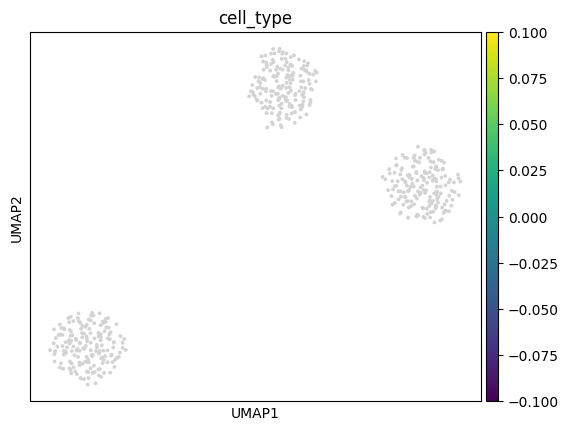

In [21]:
sc.pl.umap(adata, color=['cell_type'], size=30)
